In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as linalg

## Matrix operations  in NumPy

If we define a vector and matrix, we can multiply them explicitly, but it is better to use NumPy routines.

In [2]:
n = 30000
A = np.zeros((n, n))
x = np.zeros(n)

In [3]:
def explicit(A=None, x=None):
    n = A.shape[0]
    b = np.zeros(n)
    for i in np.arange(n):
        b[i] = (A[i, :] * x).sum()
    return(b)

In [4]:
%timeit b = explicit(A=A, x=x)

1 loop, best of 3: 1.51 s per loop


In [5]:
%timeit b = A.dot(x)

1 loop, best of 3: 324 ms per loop


One can also make outer products and other operations with NumPy arrays.

In [6]:
x = np.zeros(100)
q = np.zeros(50)
y = np.outer(x, q)
print(y.shape)

(100, 50)


And the numpy.linalg module contains a plethora of other operations.

In [7]:
y = np.zeros((100, 100))
print(linalg.det(y))

0.0


## Solving a linear system

In [8]:
n = 20
A = np.random.random((20, 20))
x_actual = np.random.random(20)

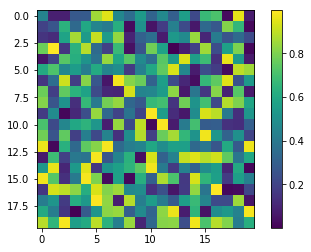

In [9]:
plt.imshow(A)
plt.colorbar()

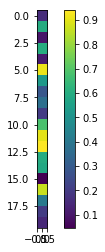

In [10]:
plt.imshow(x_actual.reshape((20, 1)))
plt.colorbar()

In [11]:
b = A.dot(x_actual)

In [12]:
x = linalg.solve(A, b).reshape(n)

In [13]:
print(x)

[ 0.15984694  0.59575015  0.1004262   0.60395185  0.11288414  0.91531164
  0.52896003  0.28794461  0.37114915  0.20456271  0.68203966  0.90514548
  0.94020947  0.5990448   0.58604394  0.0457168   0.86441354  0.4143334
  0.20349209  0.14852783]


In [14]:
print(x - x_actual)

[  2.66453526e-15   1.11022302e-15   6.66133815e-16  -4.21884749e-15
  -2.58126853e-15   3.99680289e-15  -5.55111512e-16   3.66373598e-15
   2.49800181e-15  -3.05311332e-16   2.10942375e-15  -3.33066907e-16
   1.77635684e-15   0.00000000e+00  -1.77635684e-15   8.53483950e-16
  -2.55351296e-15  -1.05471187e-15  -2.88657986e-15  -4.69069228e-15]


We can also solve this by explicitly taking the inverse. If we are going to need to solve the equation more than $N$ times, this becomes worthwhile, because we can just calculate and save the inverse, and then apply it, rather than performing the backsubstitution explicitly every time.

In [15]:
Ainv = linalg.inv(A)
x = Ainv.dot(b)
print(x - x_actual)

[  1.33226763e-14   9.88098492e-15   7.10542736e-15  -1.93178806e-14
  -1.05471187e-14   1.34336986e-14  -2.10942375e-15   1.95399252e-14
  -2.10942375e-15  -1.16573418e-14   8.10462808e-15   3.21964677e-15
   1.07691633e-14   6.55031585e-15  -3.21964677e-15  -4.66293670e-15
  -4.32986980e-15  -5.32907052e-15  -9.88098492e-15  -1.97619698e-14]


## NumPy Application of SVD

Let us explore how a matrix works as a linear mapping, and how SVD tells us about that linear mapping.

In [16]:
A = np.zeros((2, 2))
A[0, 0] = 1
A[0, 1] = 0.5
A[1, 0] = 0.5  
A[1, 1] = 1
print(A)

[[ 1.   0.5]
 [ 0.5  1. ]]


Let's take two basis vectors for the space of $\vec{x}$:

In [17]:
x0 = np.array([1., 0])
x1 = np.array([0., 1])
origin = np.array([0., 0.])

(-0.1, 1.3)

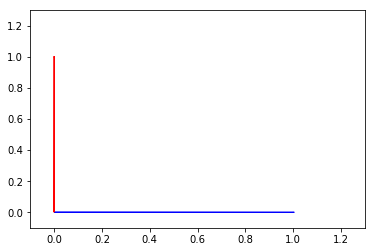

In [18]:
plt.arrow(origin[0], origin[1], x0[0], x0[1], color='blue')
plt.arrow(origin[0], origin[1], x1[0], x1[1], color='red')
plt.xlim((-0.1, 1.3))
plt.ylim((-0.1, 1.3))


In [19]:
b0 = A.dot(x0)
b1 = A.dot(x1)

(-0.1, 1.3)

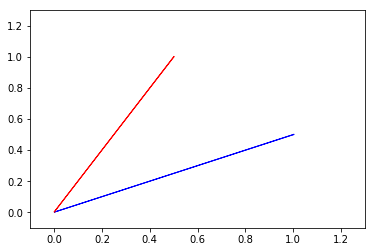

In [20]:
plt.arrow(origin[0], origin[1], b0[0], b0[1], color='blue')
plt.arrow(origin[0], origin[1], b1[0], b1[1], color='red')
plt.xlim((-0.1, 1.3))
plt.ylim((-0.1, 1.3))

In [21]:
(U, w, VT) = linalg.svd(A)

In [22]:
print(w)

[ 1.5  0.5]


In [23]:
print(U)

[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]


In [24]:
print(VT)

[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]


In [25]:
Ainv = VT.transpose().dot(np.diag(1. / w)).dot(U.transpose())
print(Ainv.dot(b0))
print(Ainv.dot(b1))

[  1.00000000e+00   3.33066907e-16]
[ -1.11022302e-16   1.00000000e+00]


## A simple singular matrix

In [26]:
A = np.zeros((2, 2))
A[0, 0] = 1
A[0, 1] = -1
A[1, 0] = -1
A[1, 1] = 1
print(A)

[[ 1. -1.]
 [-1.  1.]]


We can see clearly the range of $A$ by throwing a bunch of random points at it.

In [27]:
x = np.random.normal(size=(2, 1000))
b = A.dot(x)

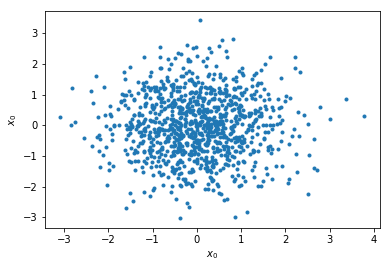

In [28]:
plt.plot(x[0, :], x[1, :], '.')
plt.xlabel("$x_0$")
plt.ylabel("$x_0$")

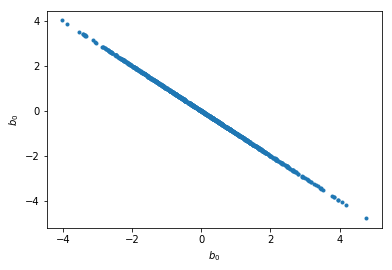

In [29]:
plt.plot(b[0, :], b[1, :], '.')
plt.xlabel("$b_0$")
plt.ylabel("$b_0$")

It is sufficient, in fact, to look just at what happens to the basis vectors (all other results are just a linear combination of those).

In [30]:
x0 = np.array([1., 0])
x1 = np.array([0., 1])
origin = np.array([0., 0.])

In [31]:
b0 = A.dot(x0)
b1 = A.dot(x1)

(-1.3, 1.3)

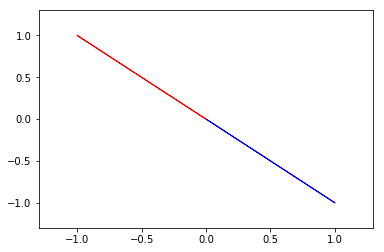

In [32]:
plt.arrow(origin[0], origin[1], b0[0], b0[1], color='blue')
plt.arrow(origin[0], origin[1], b1[0], b1[1], color='red')
plt.xlim((-1.3, 1.3))
plt.ylim((-1.3, 1.3))

SVD gives us a diagnosis; for much higher dimensional problems this is very useful.

In [33]:
(U, w, VT) = np.linalg.svd(A)

Note that this results in a zero component of $w$:

In [34]:
print(w)

[ 2.  0.]


The columns of ${\bf U}$ corresponding to non-zero $w_j$ give the range of ${\bf A}$:

In [35]:
print(U[:, 0])

[-0.70710678  0.70710678]


And the columns of ${\bf V}$ corresponding to zero $w_j$ give the null space: 

In [36]:
print(VT.transpose()[:, 1])

[ 0.70710678  0.70710678]


We can see how SVD works on some simple examples. If $\vec{b} = (-0.5, 0.6)$, we should expect to get an $\vec{x}$ that gets us as close as we can get to this within the range of ${\bf A}$. It will not get us exactly there however.

In [37]:
winv = np.zeros(len(w))
indx = np.where(w > 1.e-15)[0]
winv[indx] = 1. / w[indx]
print(winv)

[ 0.5  0. ]


In [38]:
Ainv = VT.transpose().dot(np.diag(winv)).dot(U.transpose()) 

In [39]:
b = np.array([-0.5, 0.6])
x = Ainv.dot(b)

In [40]:
print(x)

[-0.275  0.275]


${\bf A}\cdot\vec{x}$ yields some approximation of $\vec{b}$, that lies in the range:

In [41]:
bapprox = print(A.dot(x))

[-0.55  0.55]


If $\vec{b}$ is in the range, e.g. is $(1, -1)$, it can be recovered exactly: 

In [42]:
b = np.array([1., -1])
x = Ainv.dot(b)

In [43]:
print(x)

[ 0.5 -0.5]


In [44]:
bapprox = print(A.dot(x))

[ 1. -1.]


Note that the null space allows me to add any vector with $x_0 = x_1$ to the above solution. The given $\vec{x}$ is the choice which minimizes its norm.